# Data Preprocessing

In [1]:
# Cell 1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
file_path = 'diabetesdataset.csv'
data = pd.read_csv(file_path)

# Separate the features and target variable
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Define categorical and numerical columns
categorical_cols = ['gender', 'smoking_history']
numerical_cols = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Create transformers for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Building and Evaluation

In [2]:
# Cell 2
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score, classification_report

# Random Forest Model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Support Vector Machine Model
svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Artificial Neural Network Model
from tensorflow.keras.layers import Input

def create_model():
    model = Sequential([
        Input(shape=(X_train_preprocessed.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Preprocess the data for neural network
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

ann_model = KerasClassifier(model=create_model, epochs=10, batch_size=10, verbose=0)
ann_model.fit(X_train_preprocessed, y_train)
y_pred_ann = ann_model.predict(X_test_preprocessed)
print("ANN Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_ann))
print(classification_report(y_test, y_pred_ann))


Random Forest Model Evaluation
Accuracy: 0.9701
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

SVM Model Evaluation
Accuracy: 0.96245
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.98      0.57      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.97      0.79      0.85     20000
weighted avg       0.96      0.96      0.96     20000

ANN Model Evaluation
Accuracy: 0.9724
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   

# Confusion Matrix

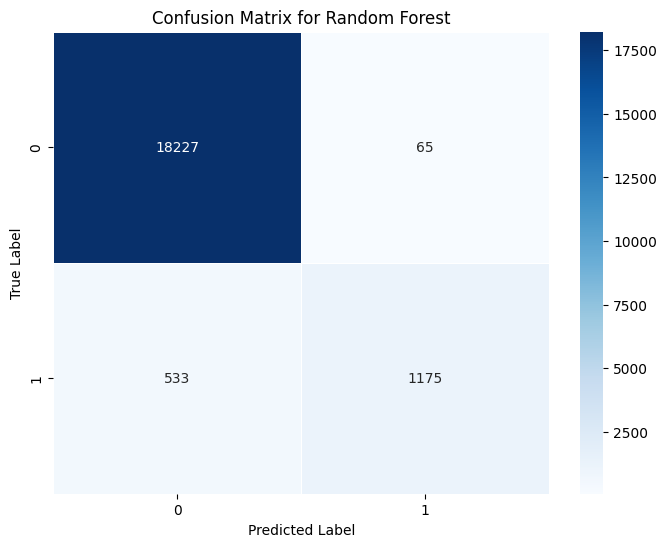

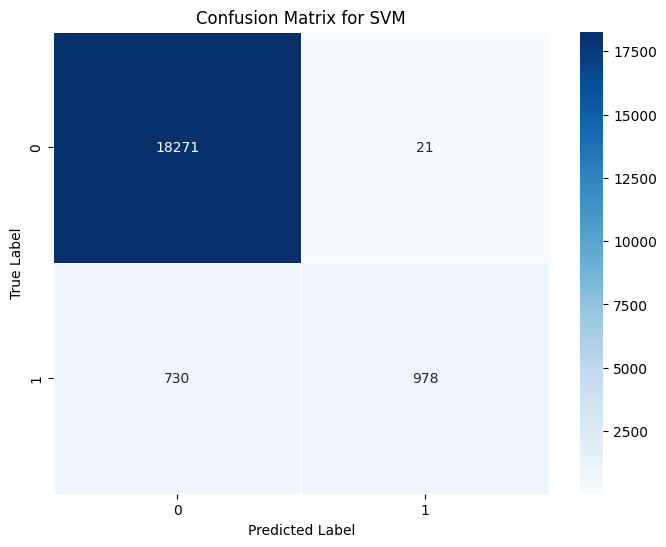

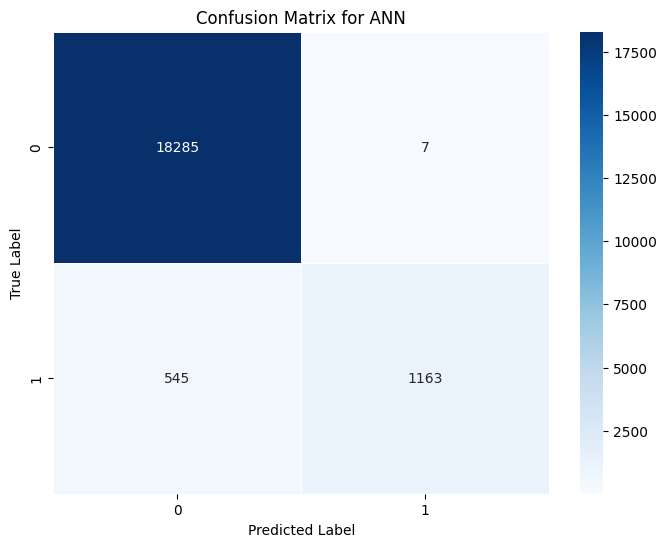

In [3]:
# Cell 3
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Compute and plot confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, "Random Forest")

# Compute and plot confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm_svm, "SVM")

# Compute and plot confusion matrix for ANN
cm_ann = confusion_matrix(y_test, y_pred_ann)
plot_confusion_matrix(cm_ann, "ANN")


# Optimization Code

#### Hyperparameter Tuning for Random Forest

In [4]:
# Cell 2: Hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV

# Parameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Grid search for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='accuracy', verbose=1)
grid_search_rf.fit(X_train, y_train)

# Best parameters and accuracy for Random Forest
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation accuracy for Random Forest:", grid_search_rf.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.9718124937411131


#### Hyperparameter Tuning for Support Vector Machine (SVM)

In [5]:
# Cell 3: Hyperparameter tuning for SVM
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

# Grid search for SVM
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=3, scoring='accuracy', verbose=1)
grid_search_svm.fit(X_train, y_train)

# Best parameters and accuracy for SVM
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation accuracy for SVM:", grid_search_svm.best_score_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for SVM: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
Best cross-validation accuracy for SVM: 0.9663625023332675


#### Hyperparameter Tuning for Artificial Neural Network (ANN)

In [6]:
# Cell 4: Hyperparameter tuning for ANN
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.optimizers import Adam

def create_model(learning_rate=0.01, activation='relu'):
    model = Sequential([
        Input(shape=(X_train_preprocessed.shape[1],)),
        Dense(128, activation=activation),
        Dense(64, activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap Keras model so it can be used by scikit-learn
ann_model = KerasClassifier(model=create_model, epochs=10, batch_size=10, verbose=0)

# Parameter distribution for ANN
param_dist_ann = {
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__activation': ['relu', 'tanh']
}

# Random search for ANN
random_search_ann = RandomizedSearchCV(ann_model, param_distributions=param_dist_ann, n_iter=10, cv=3, verbose=1)
random_search_ann.fit(X_train_preprocessed, y_train)

# Best parameters and accuracy for ANN
print("Best parameters for ANN:", random_search_ann.best_params_)
print("Best cross-validation accuracy for ANN:", random_search_ann.best_score_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


c:\Users\Abdul Rehman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for ANN: {'model__learning_rate': 0.01, 'model__activation': 'relu'}
Best cross-validation accuracy for ANN: 0.9708999929595682


## Results of Investigating the Effect of Feature Selection on the Dataset

In [10]:
# Cell for RFE with Cross-Validation for RF and SVM
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(kernel='linear', random_state=42)

# Applying RFECV with reduced cross-validation folds and parallel processing for efficiency
rfecv_rf = RFECV(estimator=rf_model, step=1, cv=5, scoring='accuracy', n_jobs=-1)
rfecv_svm = RFECV(estimator=svm_model, step=1, cv=5, scoring='accuracy', n_jobs=-1)

# Fit RFECV to the preprocessed data
rfecv_rf.fit(X_train_preprocessed, y_train)
rfecv_svm.fit(X_train_preprocessed, y_train)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(rfecv_rf.grid_scores_) + 1), rfecv_rf.grid_scores_, label='Random Forest')
plt.plot(range(1, len(rfecv_svm.grid_scores_) + 1), rfecv_svm.grid_scores_, label='SVM')
plt.title('Feature Selection CV Scores by Model')
plt.xlabel('Number of Features')
plt.ylabel('CV Score (accuracy)')
plt.legend()
plt.show()

# Display results in a table
results_table = pd.DataFrame({
    'Model': ['Random Forest', 'SVM'],
    'Optimal Features': [rfecv_rf.n_features_, rfecv_svm.n_features_],
    'Best CV Score': [max(rfecv_rf.grid_scores_), max(rfecv_svm.grid_scores_)]
})

print(results_table)
